In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
bike = pd.read_csv("Data/bike_rental_hour.csv")
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Here are the descriptions for the relevant columns:

- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

This dataset contains the hourly count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information, the original data also includes the daily count, which is not used here [download](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip)

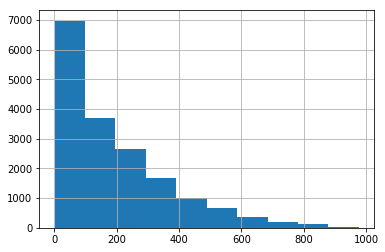

In [6]:
bike["cnt"].hist()
plt.show()

In [14]:
bike.corr()["cnt"].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [15]:
def assign_label(num):
    if num>=6 and num <12:
        return 1
    elif num >=12 and num < 18:
        return 2
    elif num >= 18 and num <= 24:
        return 3
    else:
        return 4
bike["time_label"] = bike["hr"].apply(assign_label)

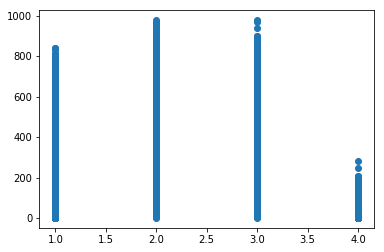

In [19]:
plt.scatter(bike["time_label"], bike["cnt"])

thinking of choosing decision tree, as the cols that correlate most with the target cells do not present a linear relationship, and the target cell is a continuous number, given the situation a DescisionTreeRegressor would be a good model to start from

In [20]:
bike.shape

(17379, 18)

In [40]:
#choose a random 80% of data from bike to be the training set
train = bike.sample(frac = .8)

In [41]:
train.shape

(13903, 18)

In [42]:
#test is the remainings:
test = bike.loc[~bike.index.isin(train.index)]

Guided proj asks for linear regression, and reminds the model works best when predictors are linearly correlated to the target and also independent

In [43]:
cols = ["season", "time_label", "atemp", "hum", "weathersit"]

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(train[cols], train["cnt"])
predict = lr.predict(test[cols])
mse = mean_squared_error(test["cnt"], predict)
rmse = np.sqrt(mse)
print(rmse)

144.849418364


181.38238043116962

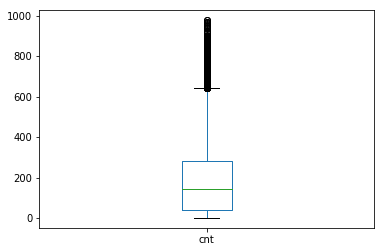

In [47]:
bike["cnt"].plot(kind = "box")
np.std(bike["cnt"])

the rmse is very high and by looking at the scatterplot and std dev we know that the existance of the outliers might have highly distorted the output

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_split = 50, min_samples_leaf = 15, max_depth = 11)
dt.fit(train[cols], train["cnt"])
prediction = dt.predict(test[cols])
mse = mean_squared_error(test["cnt"], prediction)
rmse = np.sqrt(mse)
print(rmse)


129.291837471


With min_samples_leaf parameter, the rmse does decrease, however, the change in the quantity once pass 10 doesn't seem change the output much.
Although much better, decision tree still has a relatively high rmse. Will use random forest below

In [80]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 50, min_samples_split = 50, min_samples_leaf = 12, max_features = "auto", max_depth = 11)
rfr.fit(train[cols], train["cnt"])
prediction = rfr.predict(test[cols])
mse = mean_squared_error(test["cnt"], prediction)
rmse = np.sqrt(mse)
print(rmse)

127.362103015


random forest has improved pretty obviously from the decision tree due to sophisticated bagging and ensembling.